# Leren a.d.h.v. een simpel leermodel : K-NN 
### K. Verbeeck, T. Vermeulen, J. Maervoet
Data Science (Theory) -- OGI02i

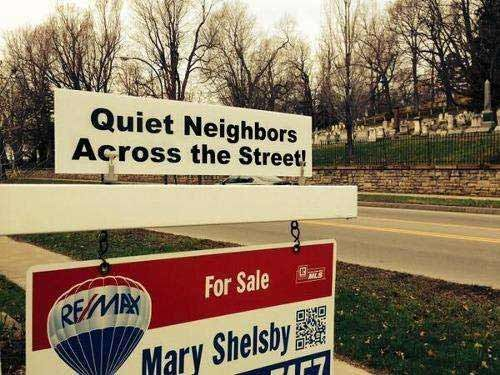

### Supervised Machine Learning

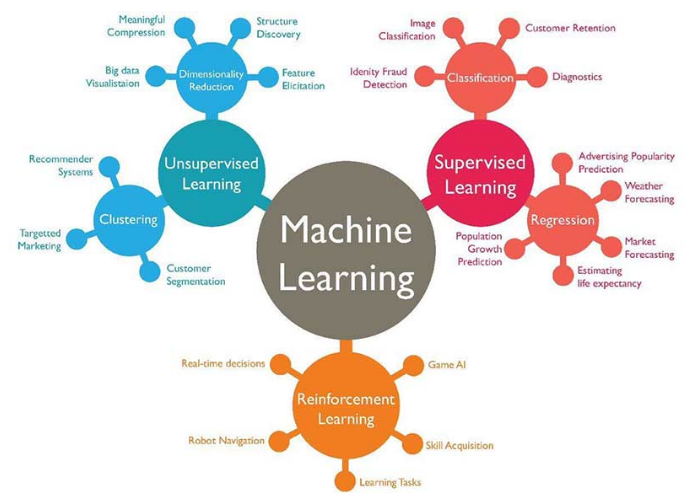

### Classification & Regression


> __Classificatie__ is een ML taak waarbij een label voorspeld moet worden uit een mogelijke lijst van antwoorden.

> Wanneer er slechts 2 mogelijke labels zijn dan noemt men dit __binaire classificatie__

Voorbeeld : je spam filter : een mail is spam of ham - je lost in dit geval een ja/nee vraag op

> Wanneer er meerdere labels mogelijk zijn dan noemt men dit __multiclass classificatie__

Voorbeeld : herkennen van handgeschreven cijfers - het antwoord kan zijn : 0,1,...,9




> __Regressie__ is een ML taak waarbij een cijfer (continue waarde) voorspeld moet worden 

Voorbeeld : iemand zijn leeftijd voorspellen, iemand zijn jaarlijks inkomen voorspellen, ...


### Generalizatie, Overfitting, en Underfitting

Wanneer je leert aan de hand van een supervisor dan heb je __trainingsdata__ ter beschikking en leer je een model op basis van deze data. Een model zal je instaat stellen om een beslissing te nemen voor elk geval (instantie) waarvan je een voorspelling wil doen. Een model mag echter niet alleen goed presteren op de trainingsdata, het model moet algemeen genoeg zijn om ook ongeziene instanties correct te gaan voorspellen. Men zegt dat het model moet kunnen generalizeren van de trainingsdata naar de __test data__. De test data is een deel van de data die je ter beschikking hebt, maar niet meeneemt tijdens het trainen van je model.
Wanneer je model extreem goed presteert op je trainingsdata, maar niet zo goed presteert op je test data spreekt men van __overfitting__.
Wanneer je model zelfs niet goed presteert op je trainingsdata dan spreek je van __underfitting__.
Zoek een punt waarbij je data goed presteert op zowel trainings- als test-data.


### overfitting :  een voorbeeld 

Voorspel wanneer iemand een boot koopt :

|Age |Nr cars|owns house|nr children|  status  |owns dog|bought a boat|
|----|:-----:|:--------:|:---------:|:--------:|:------:|------------:|
| 66 |   1   |   yes    |     2     | widowed  |   no   |    yes      |
| 52 |   2   |   yes    |     3     | married  |   no   |    yes      |
| 22 |   0   |   no     |     0     | married  |  yes   |     no      |
| 25 |   1   |   no     |     1     | single   |   no   |     no      |
| 44 |   0   |   no     |     2     | divorced |  yes   |     no      |
| 39 |   1   |   yes    |     2     | married  |  yes   |     no      |
| 26 |   1   |   no     |     2     | single   |   no   |     no      |
| 40 |   3   |   yes    |     1     | married  |  yes   |     no      |
| 53 |   2   |   yes    |     2     | divorced |   no   |    yes      |
| 64 |   2   |   yes    |     3     | divorced |   no   |     no      |
| 58 |   2   |   yes    |     2     | married  |  yes   |    yes      |
| 33 |   1   |   no     |     1     | single   |   no   |     no      |

 
      
    

mogelijke hypothesen : 
 
   * _ouder dan 45, en minder dan 3 kinderen of niet gescheiden -> dan zal je een boot kopen_  (100% accuracy -> ** overfitting **)
    
   *  _exact  66, 52, 53 of 58 jaar oud zijn -> dan zal je een boot kopen_ (100% accuracy -> ** overfitting **)
   
   * _ouder dan 50 -> dan zal je een boot kopen _ (simpelere regel die min of meer ok presteert)
   
   * _bezitter van een huis dan -> zal je een boot kopen_ (**underfitting ! **)

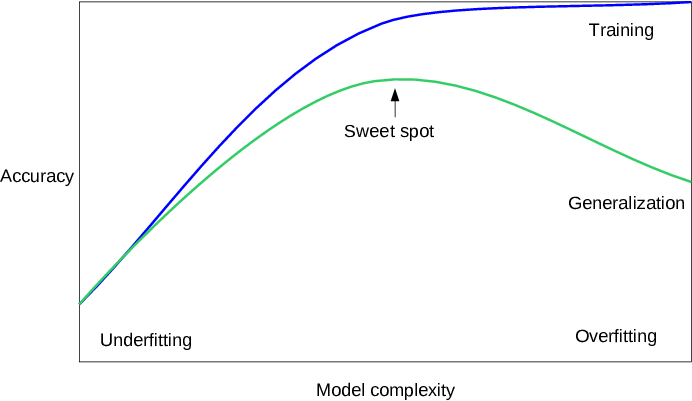

### k-NN : k-Nearest Neighbors

Waarschijnlijk het simpelste leermodel : er wordt niet echt een model opgebouwd, het enige wat er gedaan wordt is de dataset van trainingspunten bijhouden. Wanneer een voorspelling moet gebeuren voor een nieuw datapunt wordt in de dataset de **dichtste buur** gezocht (wanneer $N=1$), of de **k-dichtste buren** (waneer $N=k$).

De voorspelling van het nieuwe datapunt zal afhangen van de waarden van zijn buren.

#### Visualisatie van k-nn (classificatie) : 

$k=1$

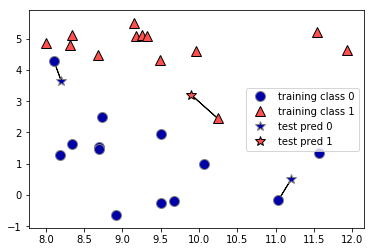

$k = 3$

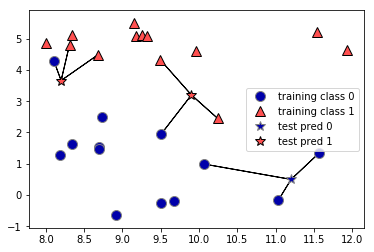

Beslissingsgrenzen bepaald door het aantal buren :

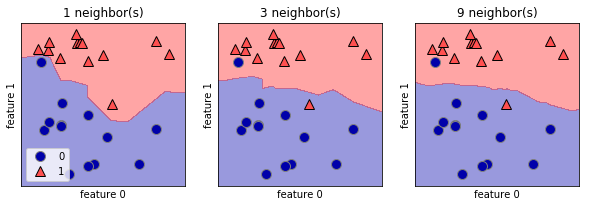

Hoe aantal buren kiezen? Hoe meer buren, hoe simpeler het model. 

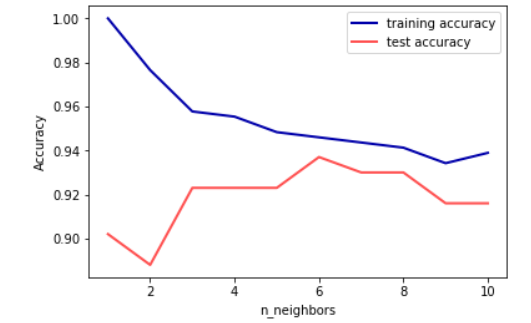

#### Visualisatie van k-NN (regressie)

$k=1$

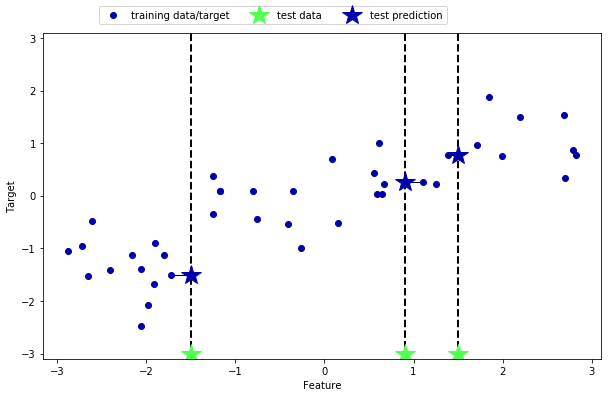

$k=3$

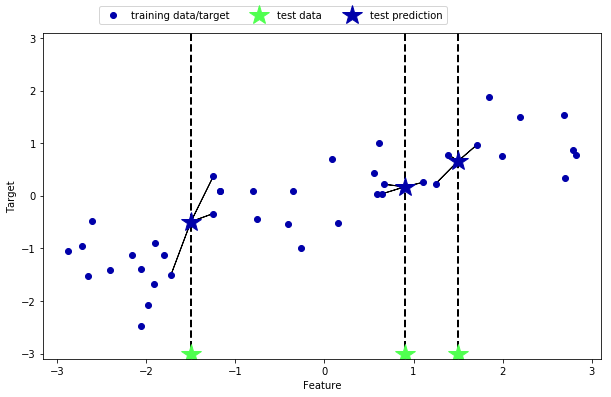

### Uitgewerkt Voorbeeld k-NN classificatie

De classificatie van Iris species : voorbeeld uit :

_An Introduction to Machine Learning with Python, Müller & Guido_

 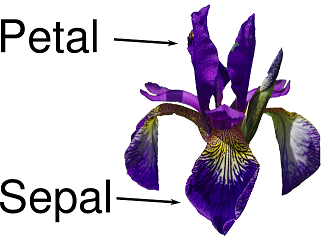

### ML learning module in Python :

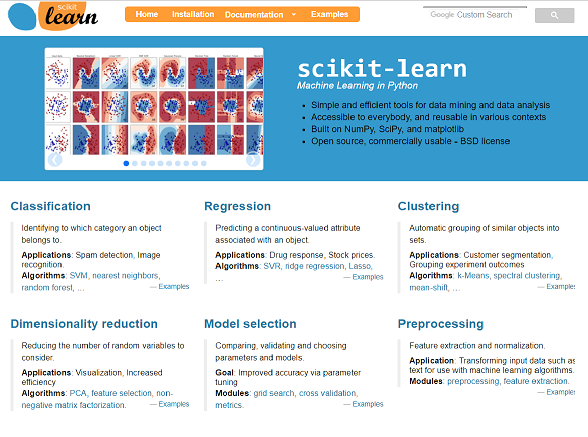

In [17]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [9]:
print("Keys of iris_dataset:\n", iris_dataset.keys())

Keys of iris_dataset:
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [10]:
print(iris_dataset['DESCR'][:193] + "\n...")

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive att
...


In [14]:
print("Feature names:\n", iris_dataset['feature_names'])

Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [15]:
print("Type of data:", type(iris_dataset['data']))

Type of data: <class 'numpy.ndarray'>


In [16]:
print("Shape of data:", iris_dataset['data'].shape)

Shape of data: (150, 4)


In [17]:
print("First five rows of data:\n", iris_dataset['data'][:5])

First five rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [18]:
print("Type of target:", type(iris_dataset['target']))

Type of target: <class 'numpy.ndarray'>


In [19]:
print("Shape of target:", iris_dataset['target'].shape)

Shape of target: (150,)


In [20]:
print("Target:\n", iris_dataset['target'])

Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### Training versus Testing 

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)
#de dataset wordt eerst via een random generator door elkaar geschud om een 
#representatieve test set te krijgen

In [14]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (112, 4)
y_train shape: (112,)


In [15]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (38, 4)
y_test shape: (38,)


#### Wat zegt de data ?

Het is steeds een goed idee om je data te visualiseren, bvb. via een scatterplot, om eventuele trends in de data te visualiseren. Het geeft je ook een idee van welk leermodel je zou kunnen gebruiken.

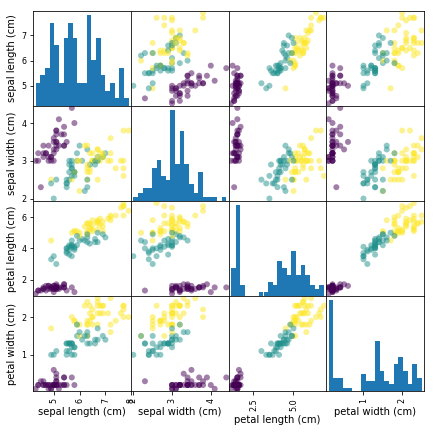

In [29]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
%matplotlib inline

iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(7, 7),
                           marker='o', hist_kwds={'bins': 20})
plt.show()

#### Een model bouwen a.d.h.v. k-Nearest Neighbors

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
#knn is een object waarop de verdere fit/predict/score operaties zullen gebeuren

In [26]:
knn.fit(X_train, y_train)
#het model wordt gebouwd 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

minkowski afstandsmaat : veralgemening van de Manhattan (p = 1) en Euclidische afstand (p = 2)
\begin{equation}
d(\bf{x_1},\bf{x_2}) = (\sum_{i=1}^{d} |x_{1i} - x_{2i}|^{1/p})^{p}
\end{equation}

### Populaire afstandsmaten in python :

<http://dataaspirant.com/2015/04/11/five-most-popular-similarity-measures-implementation-in-python/>

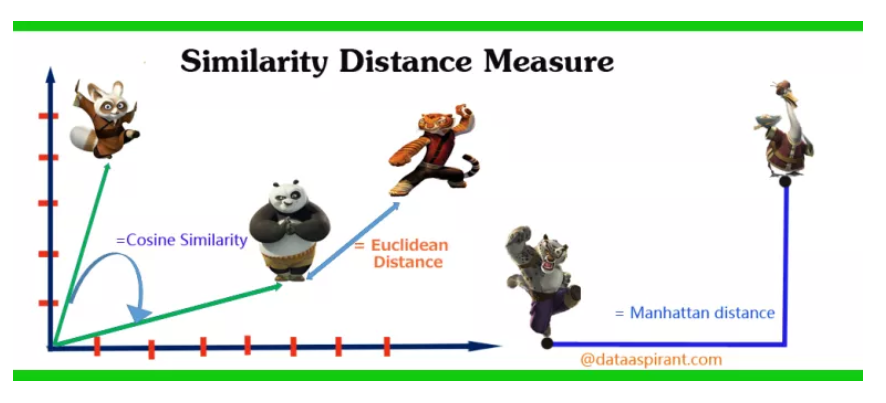

#### Voorspellingen maken

In [27]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)

X_new.shape: (1, 4)


In [28]:
#nieuwe voorspellingen worden gemaakt a.d.h.v. het model
prediction = knn.predict(X_new)
print("Prediction:", prediction)
print("Predicted target name:",
       iris_dataset['target_names'][prediction])

Prediction: [0]
Predicted target name: ['setosa']


#### Hoe goed is het model?

In [29]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [30]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


In [31]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


### Parameters van K-NN

2 belangrijke **parameters** :
 * het aantal buren k
 * hoe afstanden meten tussen 2 elementen uit de data set (Euclidische afstand (zie ook $L^2$ norm)
 Minkowski afstand (zie $L^p$ norm)
 

    

### Pro's and Cons van K-NN

**Sterktes**:
 * eenvoudig te begrijpen leermodel
 * snelle trainingsfase want **LAZY LEARNING** (verschil t.o.v. **EAGER LEARNING**)
 * voor kleinere datasets : snel en goede performantie met weinig parameter tuning
 * kan zowel voor classificatie als regressieproblemen gebruikt worden
 
**Zwaktes**:
* bij grote datasets (d.i. veel data of veel features of beide) is het voorspellen traag
* KNN gebruikt de euclidische afstandsmaat, deze schaalt niet goed bij hogere dimensies (beter :  
  _cosinus similariteit_)
* grote geheugenopslag moet ter beschikking zijn om de trainingset ter beschikking te houden   
  tijdens het leren
* niet zo geschikt voor de zgn. _sparse_ datsets (veel features die 0 zijn) (zie verder _curse of dimensionality_)


### Hoe K kiezen ?

* k noemt men een _hyperparameter_ : deze moet je vooraf instellen (tijdens de fase _model building_) en kan het resultaat van het voorspellen serieus beïnvloeden.

* er bestaat geen algemene optimale keuze voor k. Deze is datset afhankelijk.

* wanneer k klein is (weinig buren worden gebruikt) dan heeft **ruis in de data** meer effect op het resultaat dan wanneer k groot is

* wanneer k groot is (veel buren mee laten beslissen) dan wordt het effect van ruis wel geminimaliseerd, maar dan vergt het voorspellen veel rekenkracht.

* een kleine k heeft weinig last van **bias** maar geeft een hoge **variantie**, terwijl een grote k minder variantie geeft maar gevoeliger is aan bias

* Meestal wordt een oneven getal gebruikt als de waarde voor k als het aantal te voorspellen klassen even is - (dit om gelijkstand te vermijden bij voting)

* Vaak gekozen voor : $\sqrt(n)$ met $n$ het aantal datapunten

* Andere methoden gebaseerd op parameter tuning : 
  trial-and-error in combinatie met berekenen van errors, Elbow-methode 

 



### Elbow method : 

```

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
```

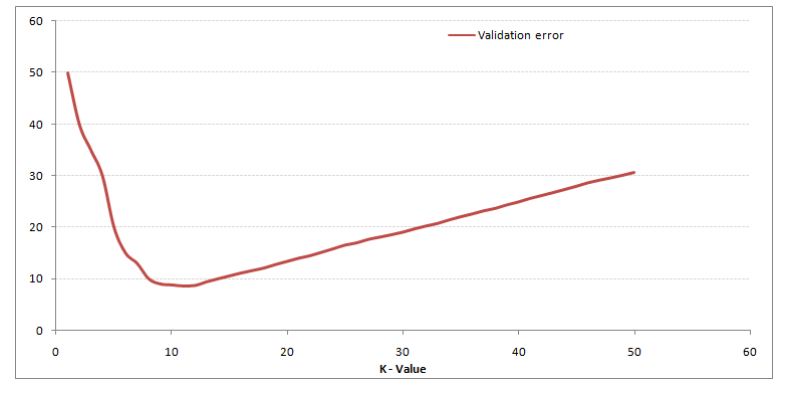

### Bias - Variance tradeoff

> **Bias** is een fout / error in het leermodel die onstaat doordat verkeerde assumpties gebruikt zijn om het model op te stellen. Een model met hoge bias zal (te) weinig rekening houden met de trainingsdata en zal het model oversimplificeren.


> **Variantie** is eveneens een fout, maar deze is te wijten aan te gevoelig zijn voor de fluctuaties in de trainingsset, waardoor ruis mee gemodelleerd kan worden en het model dus de trainingsdata te goed modelleert (overfitting!)



> de **trade-off** : beide effecten moeten vermeden worden maar vaak is het zo dat lage bias, veel variantie inhoudt en vice versa.



### Bias - Variance tradeoff

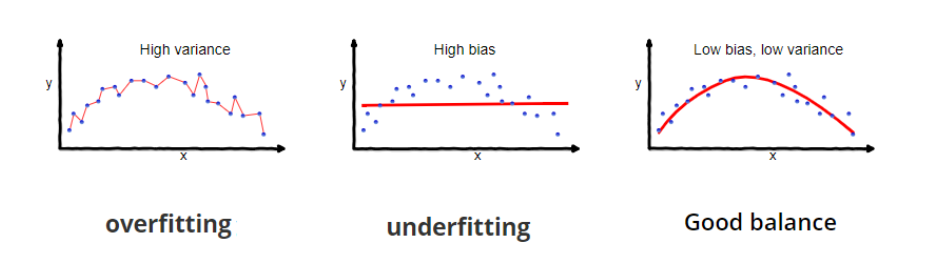

### Curse of dimensionality

Wanneer heel veel features aanwezig zijn in de data, dan is het moelijker om datapunten te vinden die dichtbij zijn (ze zijn misschien dichtbij in een bepaalde feature maar als er heel veel zijn heeft dit weinig effect op de afstand)

Dus in dit geval zullen er heel veel extra datavoorbeelden nodig zijn om goede dichte buren te vinden ! 

M.a.w. je helpt het leerprobleem niet vooruit door je data steeds rijker te beschrijven als je geen extra datavoorbeelden hebt. Bovendien bestaat ook het gevaar voor overfitting.

Als je toch extra features toevoegt dan zal je dus ook meer trainingsdata moeten toevoegen maar deze zal exponentieel moeten groeien om hetzelfde aandeel van data te voorzien en overfitting te vermijden. 

Oplossing : investeren in feature selection methoden, zoals Principal component en singular value decomposition




### Curse of  dimensionality

zie ook artikel : <http://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/>

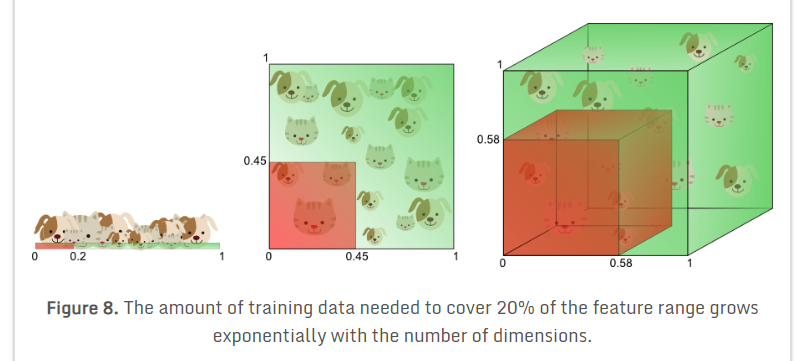



### Goede tutorials :

KNN Classification using Scikit-learn
Learn K-Nearest Neighbor(KNN) Classification and build KNN classifier using Python Scikit-learn package.
online @ <https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn>

A Practical Introduction to K-Nearest Neighbors Algorithm for Regression (with Python code)
online @ <https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/>